<a href="https://colab.research.google.com/github/whorseman/Assignments/blob/main/homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theory

In the following assignment, your task is to complete the MNIST Basics chapter. It is best to repeat everything from last week and try to answer the following questions. Afterwards you have to summarize the learned facts with two programming tasks.

What is "torch.cat()" and ".view(-1, 28*28)" doing in the beginning of the "The MNIST Loss Function" chapter?

Can you draw the neuronal network, which is manually trained in chapter "The MNIST Loss Function"?

Why is it not possible to use the accuracy as loss function?

What is the defined `mnist_loss` function doing? 


```
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()
```

Why do we need additionaly the sigmoid() function? What is it technically in our TLU?

Again, what are mini batches, why are we using them and why should they be shuffeld? 

torch.cat concentrates all images in a single tensor. They are changed from matrices to a list of vectors with .view. The -1 in .view makes sure that the vectors are as big as necessary to fit the whole axis in.

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [18]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

dset = list(zip(train_x,train_y))

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


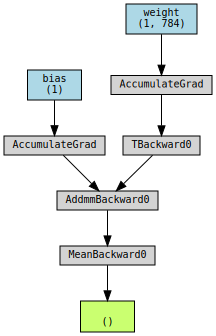

In [20]:
#drawing the neural net 

model = nn.Linear(28*28,1)

!pip install torchviz
from torchviz import make_dot

make_dot(model(train_x).mean(), params=dict(model.named_parameters()))


The loss function returns the mean of the distance between the predictions and the target 1. 


We need the sigmoid as a differntiable function that returns a value between 0 and 1 and responds to small changes in the input. Mini batches are chunks of the data the model is trained on. They are useful as they efficently use the resources at hand. That means they give the computer (usually the GPU) a size of data it can perform the gradient decent upon. The batches are shuffled to avoid clustering and bias. 

#Practical Part

Try to understand all parts of the code needed to manually train a single TLU/Perceptron, so use and copy all parts of the code from "First Try: Pixel Similarity" to the "Putting it all together" chapter. In the second step, use an optimizer, a second layer, and a ReLU as a hidden activation function to train a simple neural network. When copying the code, think carefully about what you really need and how you can summarize it as compactly as possible. (Probably each attempt requires about 15 lines of code.)

In [ ]:
#YOUR TASK: Manually train a single layer perceptron without using an optimizer.

In [5]:
#initialize parameters
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

#loss function
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()


#batch accuracy
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)
  



In [8]:
#create dataloader
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)

valid_dl = DataLoader(valid_dset, batch_size=256)

#initialize weights
weights = init_params((28*28,1))
bias = init_params(1)


#define linear model
def linear1(xb): return xb@weights + bias

In [10]:
#learning rate and parameters
lr = 1.
params = weights,bias

for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.6185 0.7958 0.9081 0.9413 0.9521 0.9585 0.9643 0.9677 0.9682 0.9702 0.9731 0.9731 0.9741 0.9741 0.9746 0.9751 0.976 0.976 0.9765 0.9765 

In [ ]:
#YOUR TASK: Train a simple two-layer neural network (two perceptrons + hidden activation function) with built-in functions and an optimizer.

**Creating an Optimizer**

In [11]:
linear_model = nn.Linear(28*28,1)
w,b = linear_model.parameters()



In [12]:
#Put in dl and Datasets

simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

dls = DataLoaders(dl, valid_dl)
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.240010,0.374979,0.538273,00:00
1,0.129064,0.190689,0.859176,00:00
2,0.086836,0.111107,0.934249,00:00
3,0.067068,0.082191,0.951423,00:00
4,0.056598,0.068186,0.962218,00:00
5,0.050389,0.060007,0.963199,00:00
6,0.046301,0.054635,0.965653,00:00
7,0.043361,0.050816,0.967125,00:00
8,0.041100,0.047946,0.967125,00:00
9,0.039277,0.045699,0.968597,00:00
